In [1]:
import pandas as pd
import urllib.request
%matplotlib inline
import seaborn as sns

In [2]:
preico_addr = '0x71c2683152b632fa1d515a3df067825e2b240216'
ico1_addr = '0xd48e165b0027e8055b3b7016a35078b23527a95d'
ico2_addr = '0x3aa5fa4fbf18d19548680a5f2bba061b18fed26b'

url_template = 'http://api.etherscan.io/api?module=account&action=txlist&sort=asc&address=%s'


In [3]:
def get_url(url):
    response = urllib.request.urlopen(url)
    data = response.read()
    return  data.decode('utf-8').replace('{"status":"1","message":"OK","result":', '').replace('}]}', '}]')

In [4]:
preico_json = get_url(url_template % preico_addr)
ico1_json = get_url(url_template % ico1_addr)
ico2_1_json = get_url(url_template % ico2_addr)
ico2_2_json = get_url((url_template+'&startblock=4263256&') % ico2_addr)


In [5]:
preico = pd.read_json(preico_json)
ico1 = pd.read_json(ico1_json)
ico2_1 = pd.read_json(ico2_1_json)
ico2_2 = pd.read_json(ico2_2_json)

ico = pd.concat([ico1, ico2_1, ico2_2])

In [6]:
#to ether from whei
preico['value'] /= 10**18
ico['value'] /= 10**18

In [7]:
ico.tail(2)

,blockHash,blockNumber,confirmations,contractAddress,cumulativeGasUsed,from,gas,gasPrice,gasUsed,hash,input,isError,nonce,timeStamp,to,transactionIndex,value
3891,0xdf7f53a8d95f72764c7f035c8ac4f1c4920d478dd643...,4281264,383,,932366,0xa4919f3b08c686a61f3ad5e4453aca332e48f463,90000,28000000000,90000,0xb3b51743112249ae074799e42e431101631564dea0a4...,0x,1,0,2017-09-16 19:16:51,0x3aa5fa4fbf18d19548680a5f2bba061b18fed26b,19,4.0
3892,0x1d1bc70c3ae9320abea29c9bbfe28bd3559f94d89981...,4281422,225,,5257396,0xa39fa7237486da77c52b046529fc28a285318413,300000,21000000000,300000,0x26085682a3508ebc97f26eddb1fe3350f308d1e8ced7...,0x,1,13,2017-09-16 20:18:03,0x3aa5fa4fbf18d19548680a5f2bba061b18fed26b,199,0.4


In [8]:
#transactions count (preico, ico)
preico.shape[0], ico.shape[0]

(1316, 19128)

In [9]:
#valid transactions (preico, ico)
preico_valid = preico[preico['isError']==0]
ico_valid = ico[ico['isError']==0]

preico_valid.shape[0], ico_valid.shape[0]

(1007, 15437)

In [11]:
#invalid transactions (preico, ico)
preico_invalid = preico[preico['isError']==1]
ico_invalid = ico[ico['isError']==1]

preico_invalid.shape[0], ico_invalid.shape[0]

(309, 3691)

In [12]:
#valid transactions percent (preico, ico)

preico_valid.shape[0] / preico.shape[0] * 100, \
    ico_valid.shape[0]/ico.shape[0]* 100

(76.51975683890578, 80.70368046842326)

In [13]:
#preico raised (valid and error)
preico.groupby('isError').sum().value

isError
0    5063.229048
1     903.947446
Name: value, dtype: float64

In [14]:
#ico raised (valid and error)
ico.groupby('isError').sum().value

isError
0    81254.673739
1    16896.907349
Name: value, dtype: float64

In [15]:
#median incoming per transactions (ico)

ico_valid['value'].median()

1.0

In [16]:
#median incoming per person (ico)
ico_valid.groupby('from').sum()['value'].median()

1.196

In [17]:
#avg incoming per transactions (preico, ico)

(preico_valid.sum().value / preico_valid.shape[0]), \
    (ico_valid.sum().value / ico_valid.shape[0])

(5.0280328179441565, 5.2636311290129143)

In [20]:
#unique addresses
ico_valid['from'].unique().shape[0]

12425

In [21]:
#avg incoming per person (preico, ico)

(preico_valid.sum().value / preico_valid['from'].unique().shape[0]), \
    (ico_valid.sum().value / ico_valid['from'].unique().shape[0])


(6.1150109271373978, 6.5396115684967686)

In [22]:
#top persons on preico
preico_valid.groupby('from').sum().sort_values('value', ascending=False)['value'].head(10)

from
0x074d2523c78e59dd0abcf61dd88f2354c0e5b697    500.000000
0xf84305d4077ec7e5546adf6f6c89b11e9b694bbc    489.000000
0x5aaf1c31254a6e005fba7f5ab0ec79d7fc2b630e    142.000000
0xe32ea43ee8670a04cd679c3bdde672188a11511f    136.320000
0x1d0738b927dfcbfbd59a9f0944bbd1860d3b9248    130.100000
0x4adc8d6d1ace99ce85438a111844c648babf814d    100.714000
0x8dbd7b3258be2824df1b3f87430d508638408cc1     70.321302
0x971a7659b8f1a887cc96414be36ca3fc885778d7     55.000000
0x7fc84138f145ba8f7bead5f970b621eaaf308238     52.000000
0xe334c2f2a6749efd1747bb28544751df51917e3c     50.000000
Name: value, dtype: float64

In [30]:
#top transactions on ico
ico_valid.sort_values('value', ascending=False)['value'].head(10)

550     15125.0
1790     3000.0
5176     1000.0
6580     1000.0
7847     1000.0
796       800.0
2918      667.0
2430      500.0
854       500.0
239       465.0
Name: value, dtype: float64

In [23]:
#top persons on ico
ico_valid.groupby('from').sum().sort_values('value', ascending=False)['value'].head(10)

from
0x31ad75479d7757a43e7ccc5bd72a78aa295f8754    15125.0
0xaac3b69a5197dd6b1cbab3674f9412a67d4d5ec9     3000.0
0xae748eb0d061a1121847fe9462bc6ed3c21b6865     1010.0
0x76edd365c44a612c91dd633662b7756adf3c46c2     1000.0
0x0464b244c6ccdce93bd2a510fb94f1240b4ad479     1000.0
0xfc2fe4c408a0af4c07d9a45453a9cd85cc042fac      800.0
0xebb6d58cd96d2617b23b19b8a4ae45a64c4502a7      667.0
0xeca935f795af72529d61b02113b60c19c5f4fdd7      500.0
0x18a19f00c2124495984776d701155c7c8b7d6625      500.0
0xd7cb7484ab22b47d788a34cd8035b9f7b512d371      465.1
Name: value, dtype: float64

In [24]:
#top persons by transactions count on preico
preico_valid.groupby('from').count().sort_values('value', ascending=False)['value'].head(10)

from
0x318ce896a1520dea2f1748a97b2b631bce44f378    6
0x77086b7ff405af6175f88ccc81c67f0b7c050846    5
0x5031129a4a1c0eaa0b98f989f9f3087c9a236451    4
0xf8c41fce8460a392d22f441835e653d2f9fa8caa    4
0x50fa7fdded5d6524d548d9f719cebdc52e0253bb    4
0x0299920d70dac3c5299d45a62ebf7c66448f2f97    4
0x4a6f39d8c90b6ef31e3191bfecf6727f4cc52358    4
0x84c14317b8152ec0317ae420ad8a77ac904eb523    4
0x74bf6ed447ae4d994a15c618b51f16b77936c6c6    3
0xf30e833ef51ef7c478f1411aeb1b3b81f28a5a58    3
Name: value, dtype: int64

In [25]:
#top persons by transactions count on ico
ico_valid.groupby('from').count().sort_values('value', ascending=False)['value'].head(10)

from
0x7ed1e469fcb3ee19c0366d829e291451be638e59    59
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98    21
0xe7ff568d7ce43384f1069ad66ef9feeae5d41f08    11
0x94fdc3e98315ff5d5d64907e377011f407cf9347    10
0x74b94cc35855a3156cb8f8ba341a122536b75ec1    10
0x873104a06f5e8eb115be8c94e6a19ca3e56623d0    10
0xc6d655252082ce78c723f6862559a3a86023db52    10
0xca2c8d9ba6ca96b3e0cc51c101d34a164900e7de    10
0x5031129a4a1c0eaa0b98f989f9f3087c9a236451     9
0x93272b1e5b5d2d642f5edc79f9a0cd93a1b11449     9
Name: value, dtype: int64

In [26]:
#transactions of the addr with the biggest transactions count
ico_valid[ico_valid['from'] == '0x7ed1e469fcb3ee19c0366d829e291451be638e59'].head(10)[['timeStamp', 'value']], \
ico_valid[ico_valid['from'] == '0x7ed1e469fcb3ee19c0366d829e291451be638e59'].tail(10)[['timeStamp', 'value']]

(               timeStamp     value
 1229 2017-08-29 13:18:51  3.335000
 2114 2017-08-29 13:50:01  0.680000
 2435 2017-08-29 13:56:18  2.983000
 2632 2017-08-29 14:10:51  0.064171
 3048 2017-08-29 14:40:42  4.000000
 2168 2017-08-30 03:10:24  0.508491
 2690 2017-08-30 06:12:01  0.108740
 2767 2017-08-30 06:34:56  0.850000
 2971 2017-08-30 07:42:08  0.089858
 3215 2017-08-30 10:40:03  0.910555,                timeStamp     value
 2512 2017-09-15 16:35:14  2.000000
 2624 2017-09-15 19:03:06  1.000000
 2685 2017-09-15 21:13:04  1.000000
 2814 2017-09-16 00:54:53  1.000000
 2859 2017-09-16 02:19:05  0.820000
 2949 2017-09-16 05:16:43  1.993740
 2980 2017-09-16 08:59:12  2.100000
 2985 2017-09-16 09:09:27  1.000000
 3466 2017-09-16 14:46:59  0.372545
 3789 2017-09-16 17:32:43  5.800000)

In [27]:
ico_err = set(ico[ico["isError"]==1]["from"])
ico_valid_set = set(ico[ico["isError"]==0]["from"])

not_reenter = ico_err - ico_valid_set
print(len(not_reenter))


ico[ico['from'].isin(not_reenter)].sum()['value']

552


2337.5617919263218

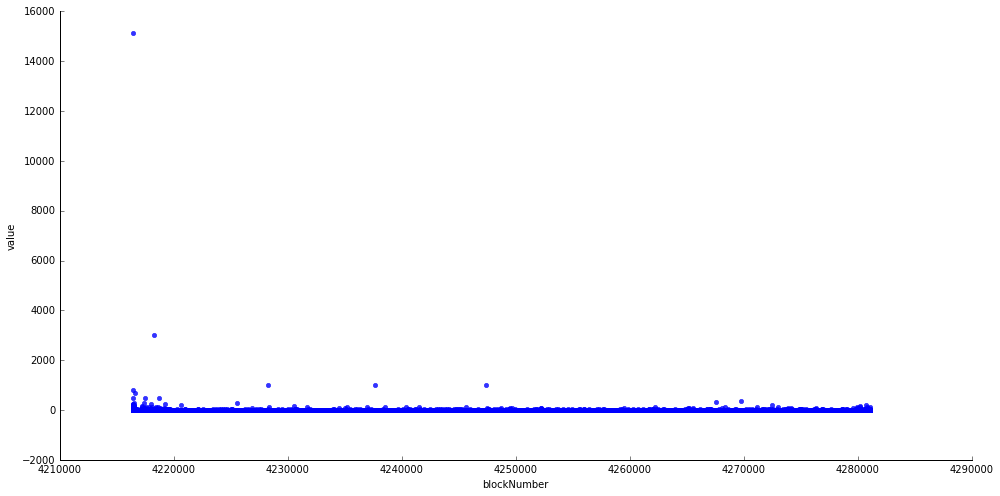

In [28]:
sns.lmplot(
    'blockNumber', 
    'value', 
    data=ico_valid[ico_valid['blockNumber']>4215000], 
    fit_reg=False, size=7, aspect=2
)

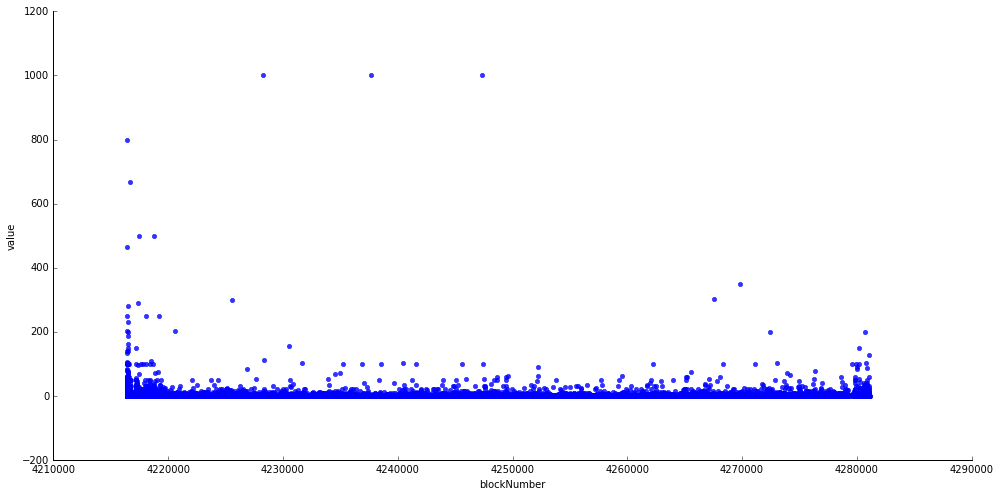

In [29]:
sns.lmplot(
    'blockNumber', 
    'value', 
    data=ico_valid[(ico_valid['blockNumber']>4215000)&( ico_valid['value']<3000)], 
    fit_reg=False, size=7, aspect=2
)


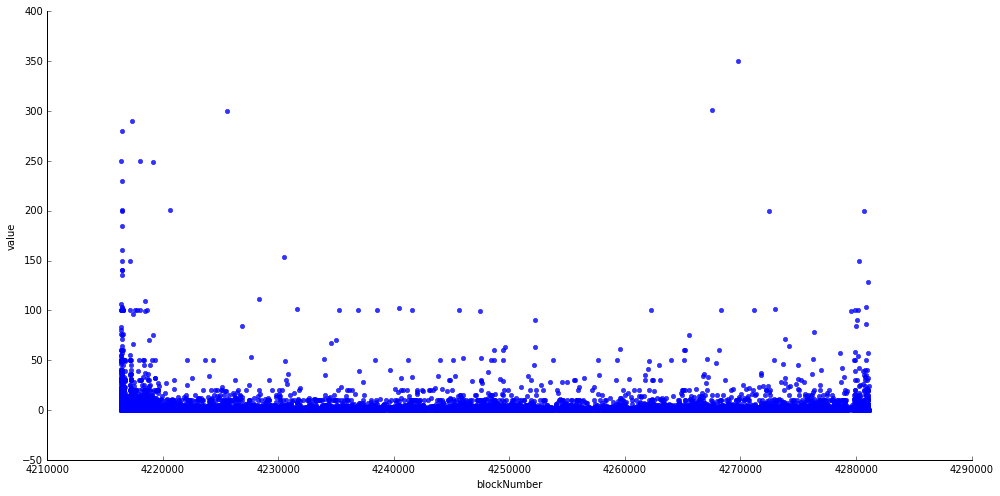

In [32]:
sns.lmplot(
    'blockNumber', 
    'value', 
    data=ico_valid[(ico_valid['blockNumber']>4215000)&( ico_valid['value']<400)], 
    fit_reg=False, size=7, aspect=2
)
